In [1]:
import pandas as pd
import numpy as np


from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('NFLX.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [4]:
df.drop('Adj Close',axis = 1,inplace = True)

In [5]:
#convert object datatype
df['Date']

0       2018-02-05
1       2018-02-06
2       2018-02-07
3       2018-02-08
4       2018-02-09
           ...    
1004    2022-01-31
1005    2022-02-01
1006    2022-02-02
1007    2022-02-03
1008    2022-02-04
Name: Date, Length: 1009, dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Date']

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [8]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [9]:
df.head().T

,0,1,2,3,4
Date,2018-02-05 00:00:00,2018-02-06 00:00:00,2018-02-07 00:00:00,2018-02-08 00:00:00,2018-02-09 00:00:00
Open,262.0,247.699997,266.579987,267.079987,253.850006
High,267.899994,266.700012,272.450012,267.619995,255.800003
Low,250.029999,245.0,264.329987,250.0,236.110001
Close,254.259995,265.720001,264.559998,250.100006,249.470001
Volume,11896100,12595800,8981500,9306700,16906900
year,2018,2018,2018,2018,2018
month,2,2,2,2,2
day,5,6,7,8,9


In [10]:
df.drop('Date',axis = 1,inplace = True)

In [11]:
df

,Open,High,Low,Close,Volume,year,month,day
0,262.000000,267.899994,250.029999,254.259995,11896100,2018,2,5
1,247.699997,266.700012,245.000000,265.720001,12595800,2018,2,6
2,266.579987,272.450012,264.329987,264.559998,8981500,2018,2,7
3,267.079987,267.619995,250.000000,250.100006,9306700,2018,2,8
4,253.850006,255.800003,236.110001,249.470001,16906900,2018,2,9
...,...,...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,20047500,2022,1,31
1005,432.959991,458.480011,425.540009,457.130005,22542300,2022,2,1
1006,448.250000,451.980011,426.480011,429.480011,14346000,2022,2,2
1007,421.440002,429.260010,404.279999,405.600006,9905200,2022,2,3


In [12]:
df.shape

(1009, 8)

In [13]:
#checking null count
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
year      0
month     0
day       0
dtype: int64

In [14]:
# checking duplicates
df.duplicated().sum()

0

In [15]:
#finally checking dtype
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
year        int64
month       int64
day         int64
dtype: object

In [16]:
df.describe()

,Open,High,Low,Close,Volume,year,month,day
count,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03,1009.000000,1009.000000,1009.000000
mean,419.059673,425.320703,412.374044,419.000733,7.570685e+06,2019.595639,6.540139,15.717542
std,108.537532,109.262960,107.555867,108.289999,5.465535e+06,1.155997,3.428207,8.759264
min,233.919998,250.649994,231.229996,233.880005,1.144000e+06,2018.000000,1.000000,1.000000
25%,331.489990,336.299988,326.000000,331.619995,4.091900e+06,2019.000000,4.000000,8.000000
50%,377.769989,383.010010,370.880005,378.670013,5.934500e+06,2020.000000,7.000000,16.000000
75%,509.130005,515.630005,502.529999,509.079987,9.322400e+06,2021.000000,10.000000,23.000000
max,692.349976,700.989990,686.090027,691.690002,5.890430e+07,2022.000000,12.000000,31.000000


In [17]:
#checking corr
df.corr()

,Open,High,Low,Close,Volume,year,month,day
Open,1.000000,0.998605,0.998508,0.996812,-0.415838,0.809151,0.130646,-0.014462
High,0.998605,1.000000,0.998203,0.998551,-0.400699,0.810559,0.129469,-0.015013
Low,0.998508,0.998203,1.000000,0.998544,-0.432116,0.809264,0.131444,-0.013412
Close,0.996812,0.998551,0.998544,1.000000,-0.413362,0.810160,0.129959,-0.014870
Volume,-0.415838,-0.400699,-0.432116,-0.413362,1.000000,-0.401308,-0.115963,0.090775
year,0.809151,0.810559,0.809264,0.810160,-0.401308,1.000000,-0.120315,-0.015602
month,0.130646,0.129469,0.131444,0.129959,-0.115963,-0.120315,1.000000,0.006903
day,-0.014462,-0.015013,-0.013412,-0.014870,0.090775,-0.015602,0.006903,1.000000


<Axes: >

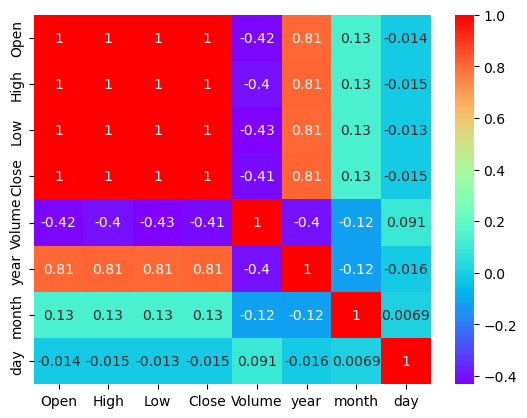

In [18]:
sns.heatmap(df.corr(),annot = True,cmap = 'rainbow')

<Axes: xlabel='Open', ylabel='Close'>

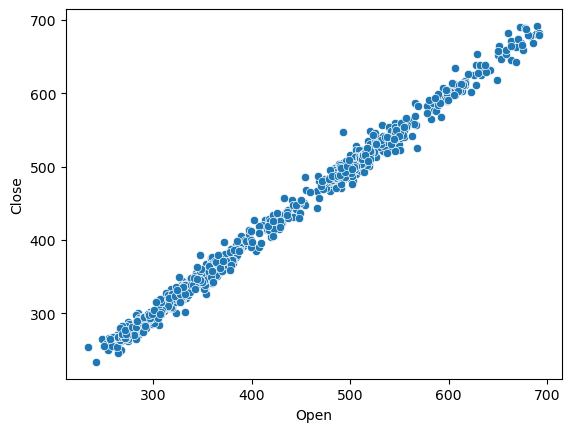

In [19]:
sns.scatterplot(x = df['Open'],y = df['Close'])

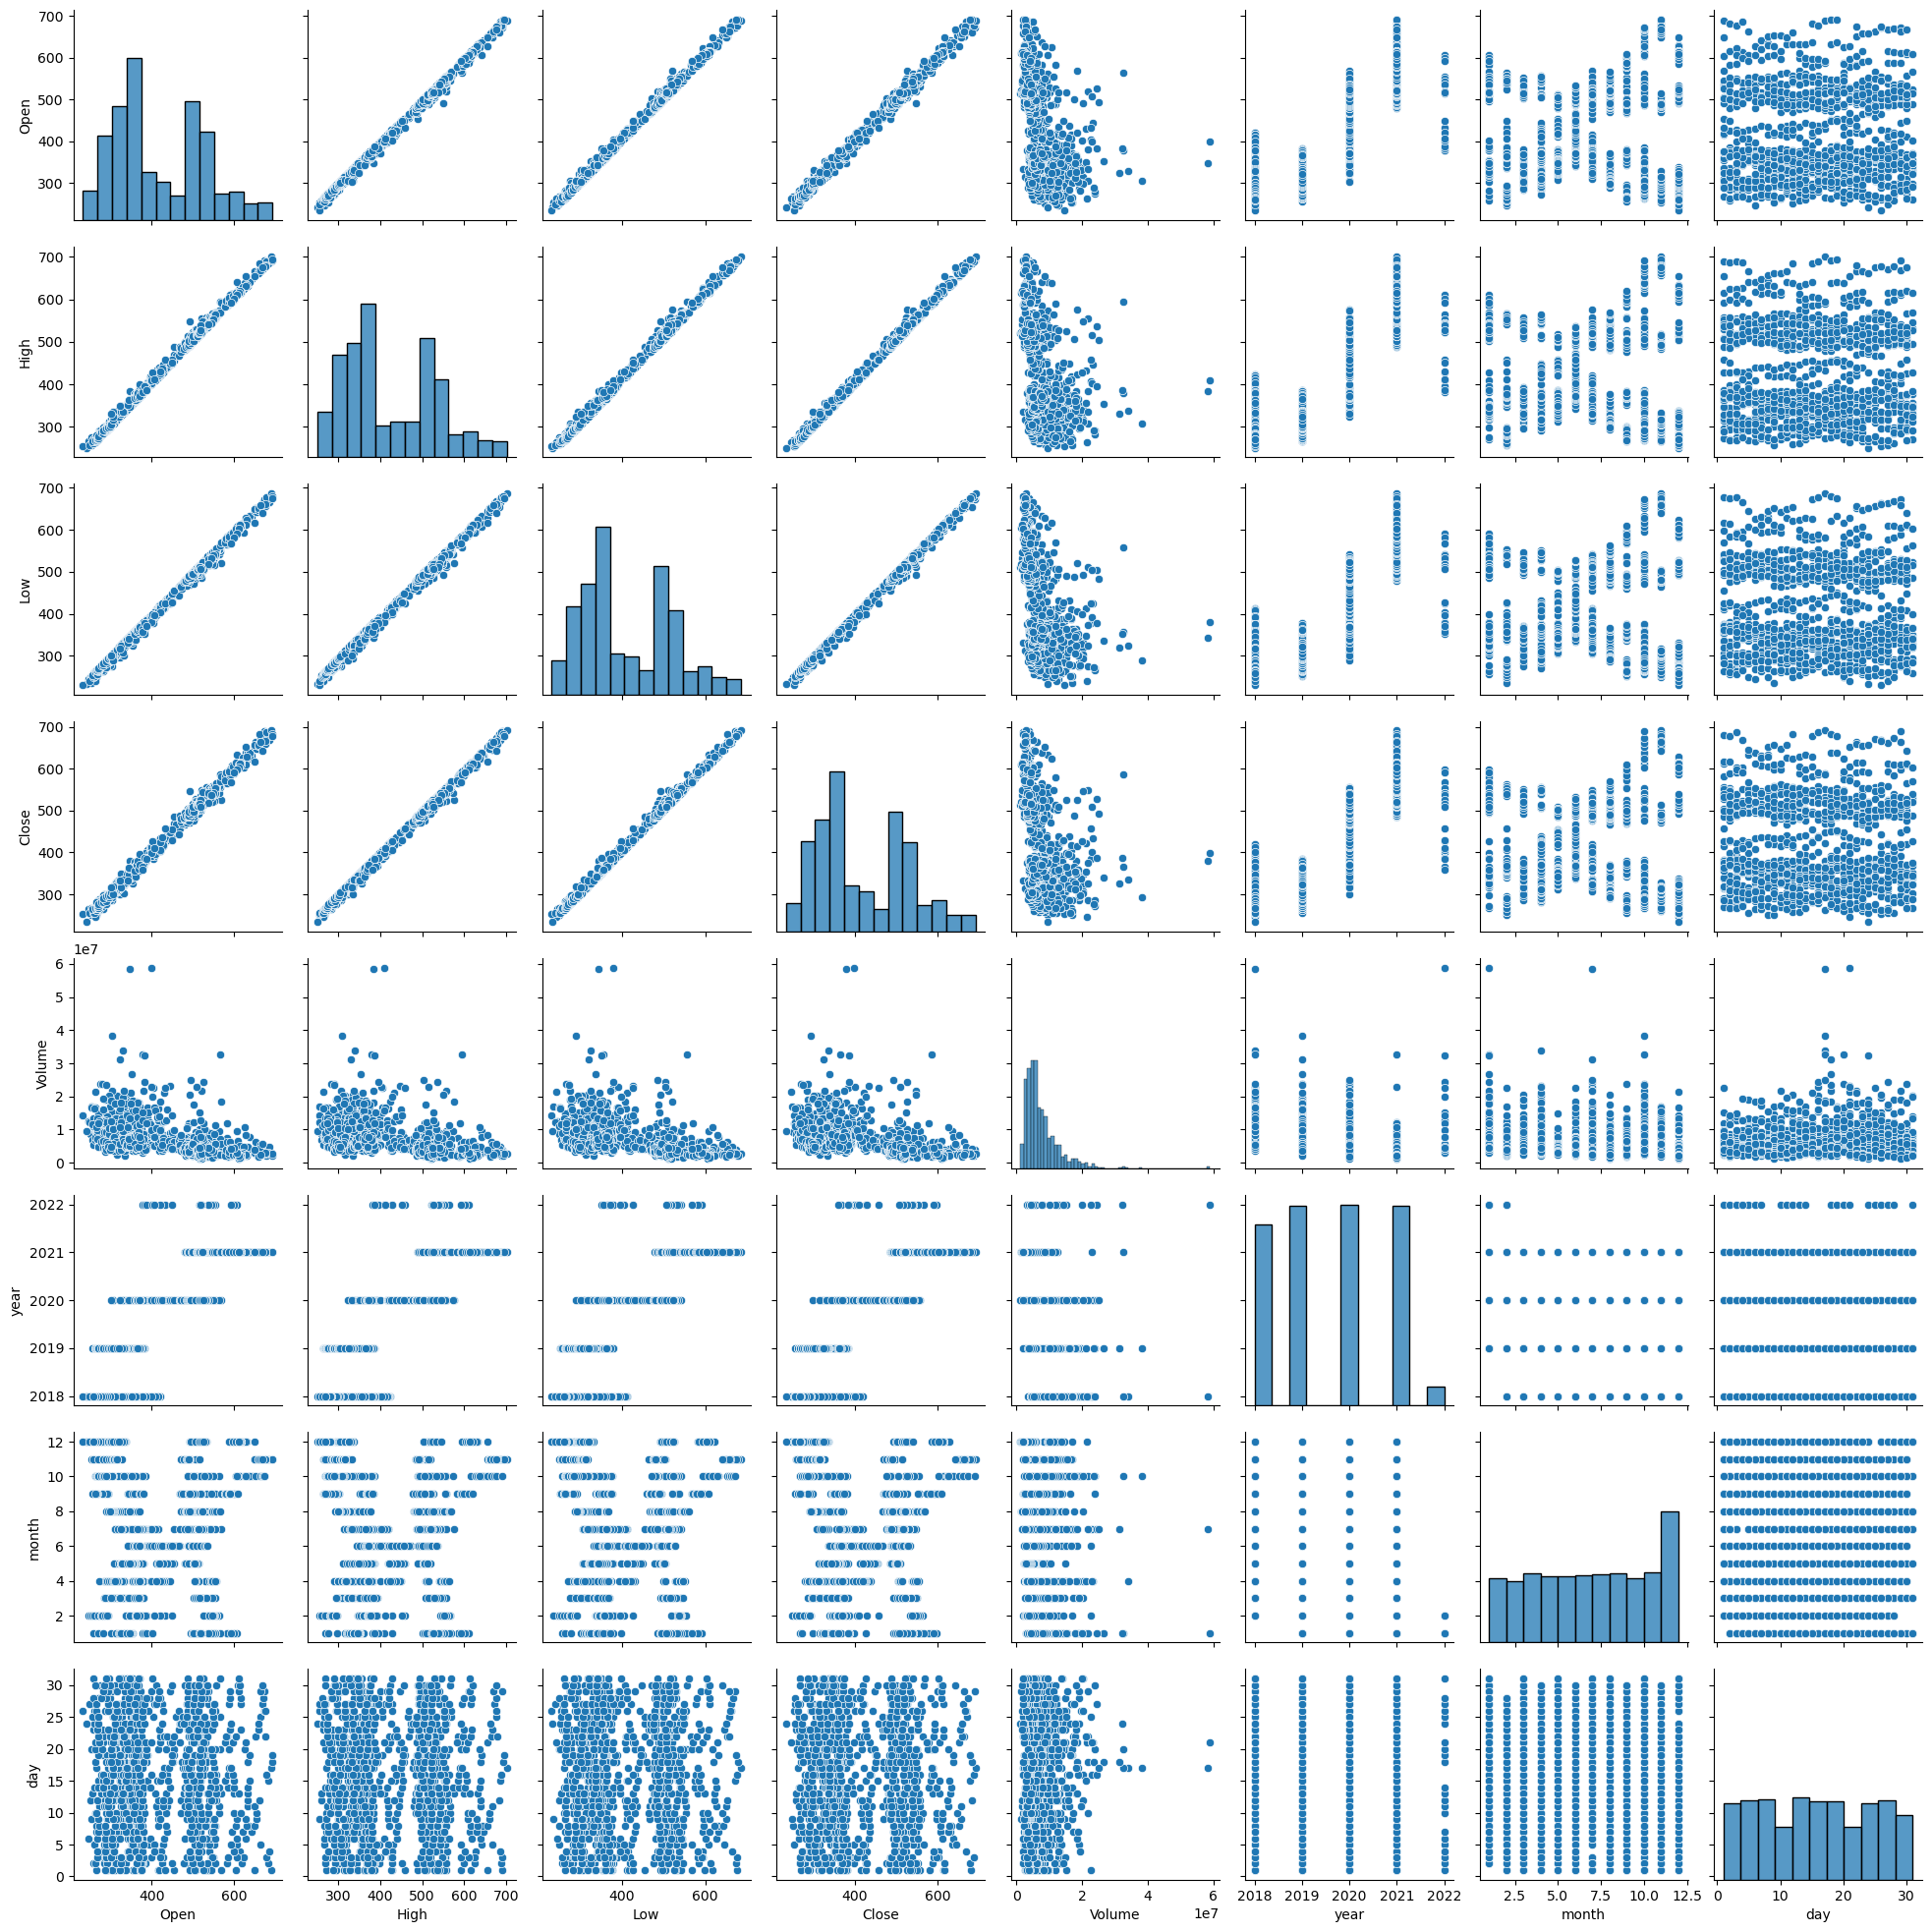

In [20]:
#strong linerar realiton betn open and close col
sns.pairplot(df)

<Axes: xlabel='Open', ylabel='Density'>

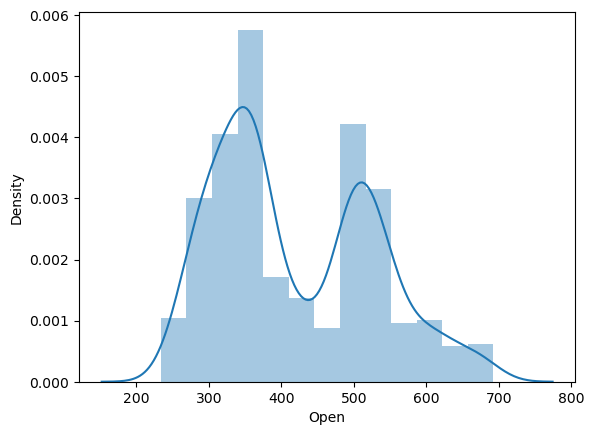

In [21]:
sns.distplot(df['Open'])

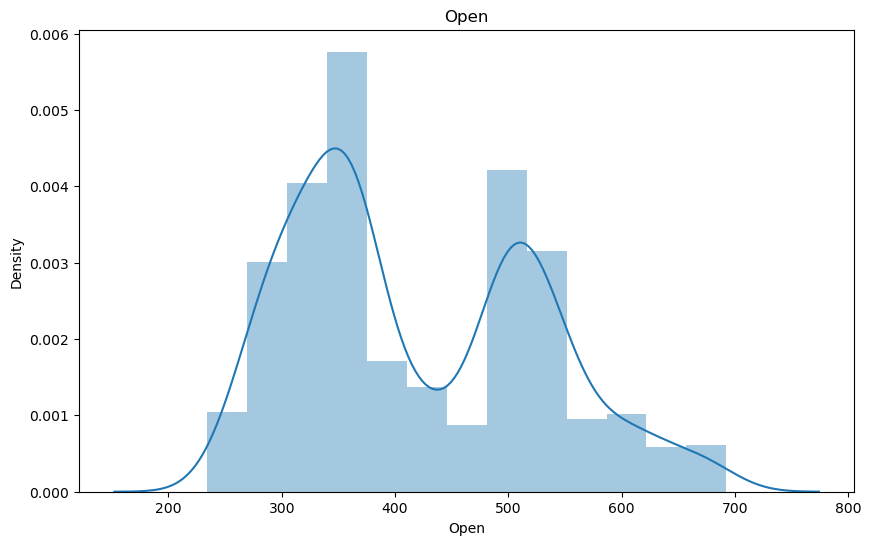

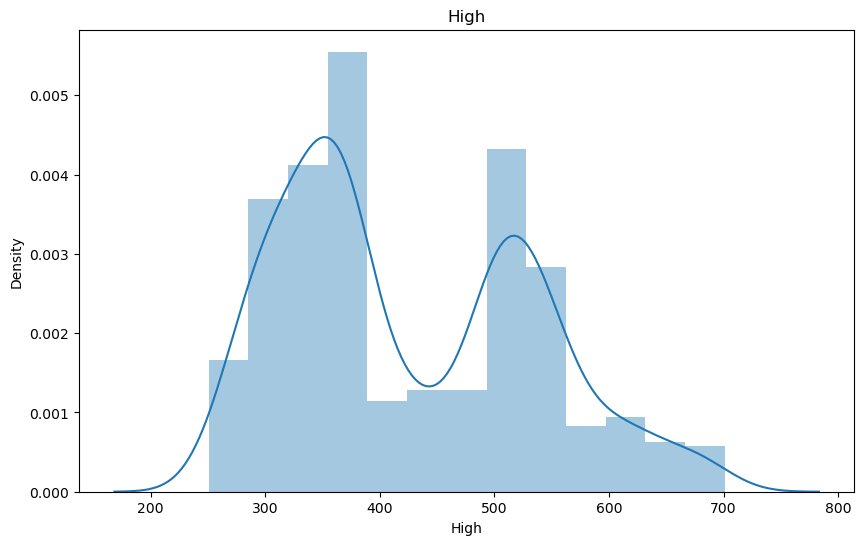

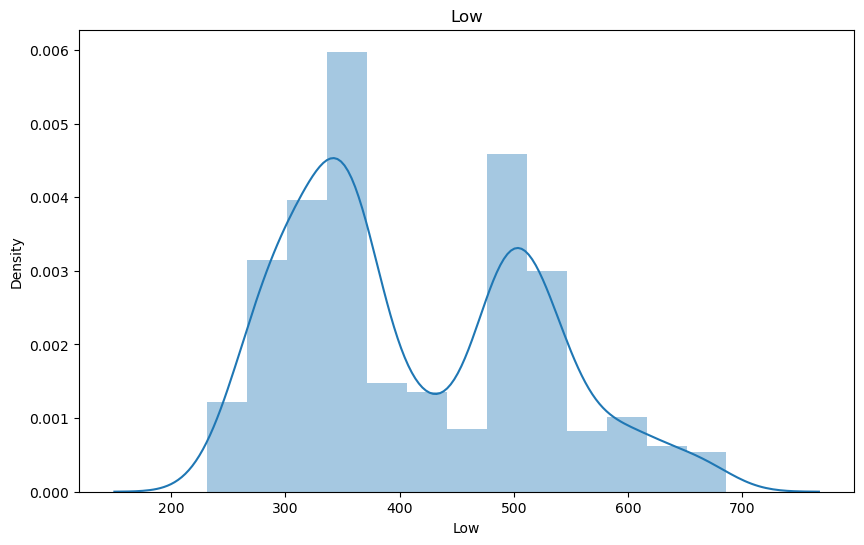

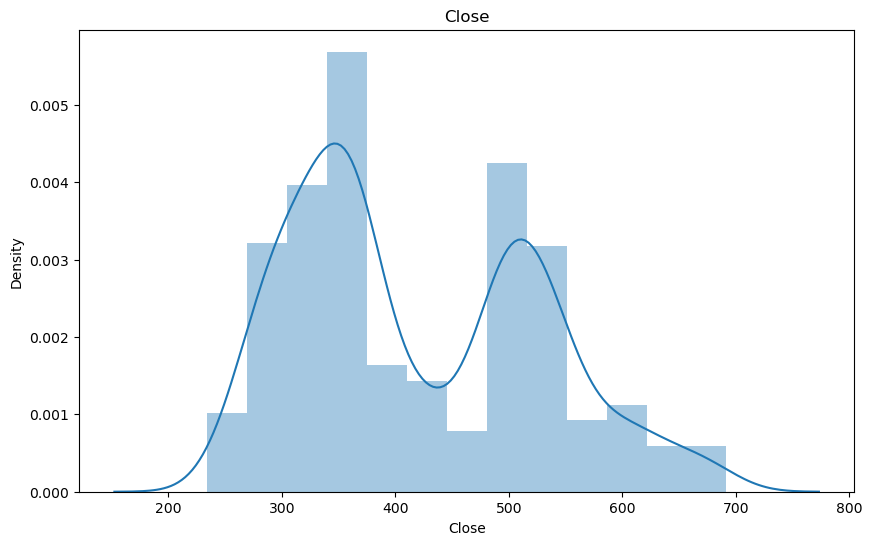

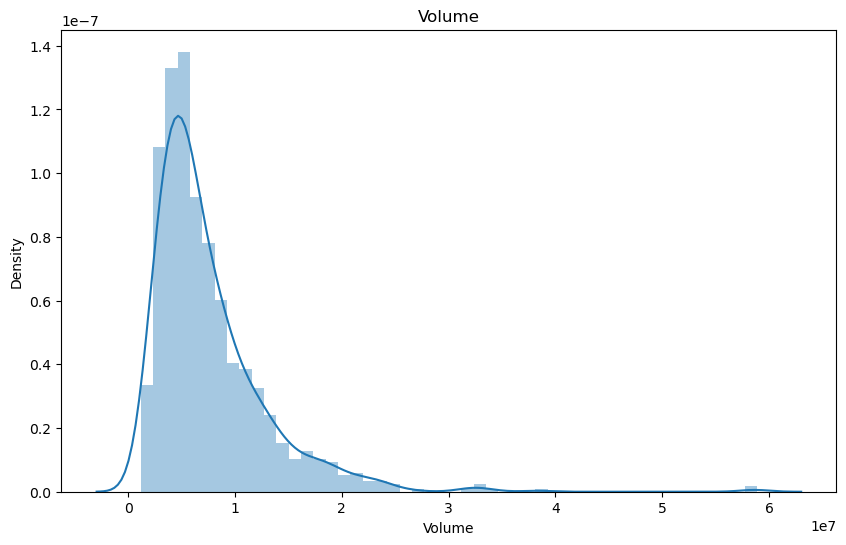

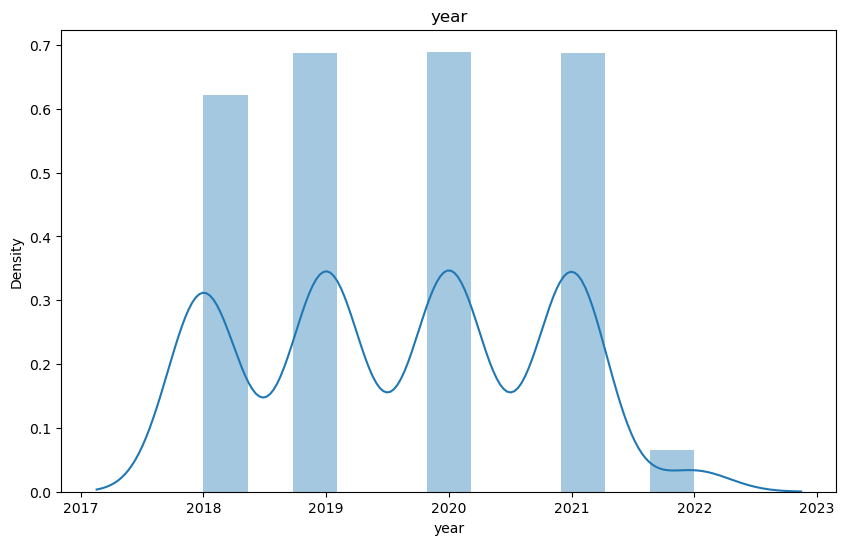

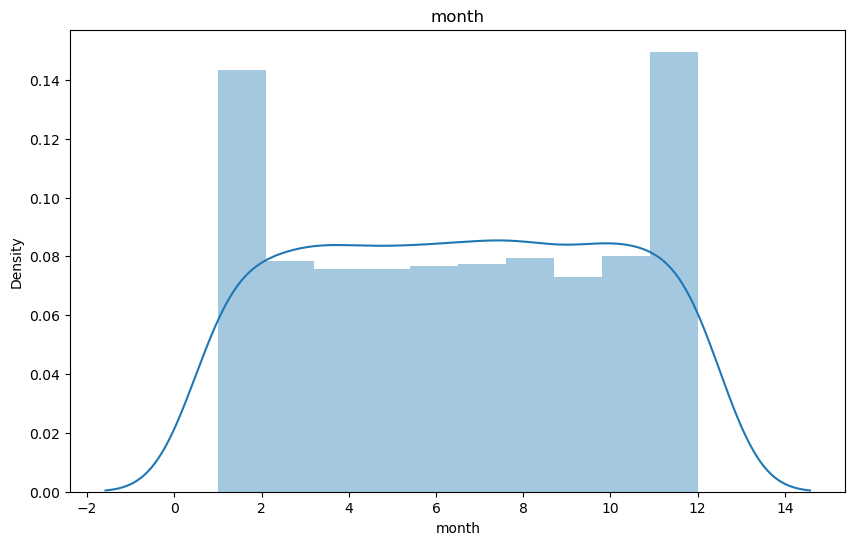

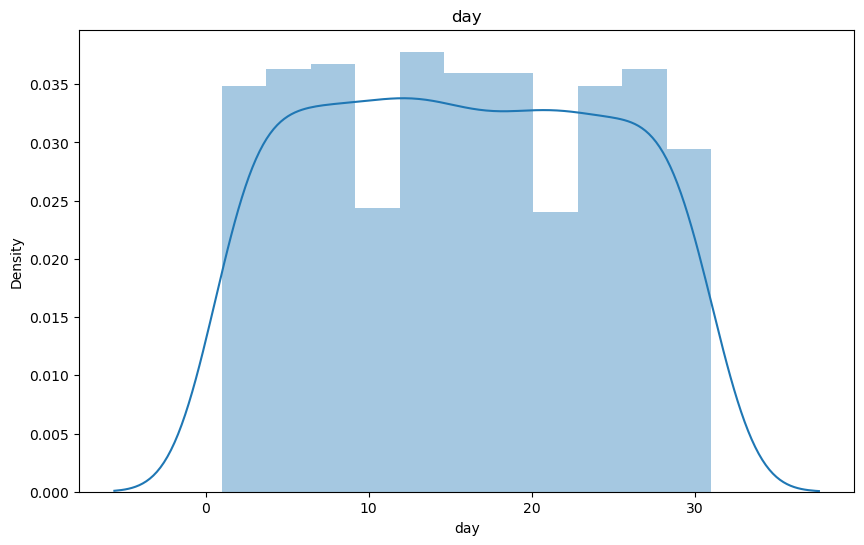

In [22]:
# checking for each column

for i in df.columns:
    plt.figure(figsize = (10,6))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='Open', ylabel='Close'>

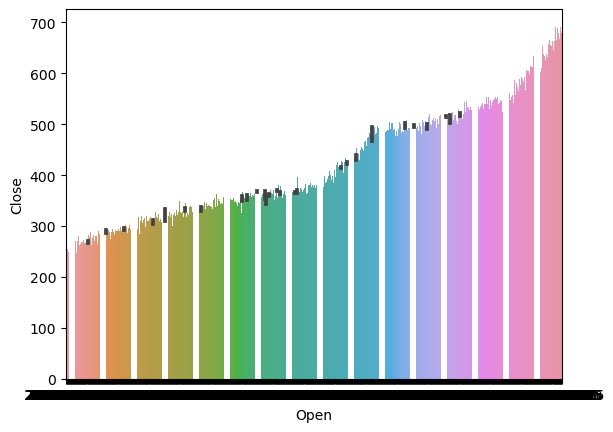

In [23]:
sns.barplot(x=df['Open'],y=df['Close'])

In [24]:
x = df.drop('Close', axis = 1)
y = df['Close']

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 11)

In [26]:
x_train.shape

(807, 7)

In [27]:
x_test.shape

(202, 7)

In [28]:
x.columns

Index(['Open', 'High', 'Low', 'Volume', 'year', 'month', 'day'], dtype='object')